# DATA CLEANING

## 1- Introduction

### Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./AviationData.csv", encoding='latin-1')

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_43030/2826190959.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./AviationData.csv", encoding='latin-1')


In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## 2- First step of Data Cleaning

Now that we have anaylsed every columns, let's drop those who are useless.

In [5]:
columns_to_drop = [
    'Event.Id',
    'Accident.Number',
    'Location', 
    'Country',
    'Latitude',
    'Longitude',
    'Airport.Code',
    'Airport.Name',
    'Registration.Number',
    'FAR.Description',
    'Schedule',
    'Air.carrier',
    'Report.Status',
    'Publication.Date',
    'Aircraft.Category',
    'Broad.phase.of.flight',
]

In [2]:
df_clean = df.drop(columns=columns_to_drop)

NameError: name 'df' is not defined

In [7]:
df_clean.columns

Index(['Investigation.Type', 'Event.Date', 'Injury.Severity',
       'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [1]:
df_clean.head()

NameError: name 'df_clean' is not defined

Let's look at our missing values.

In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

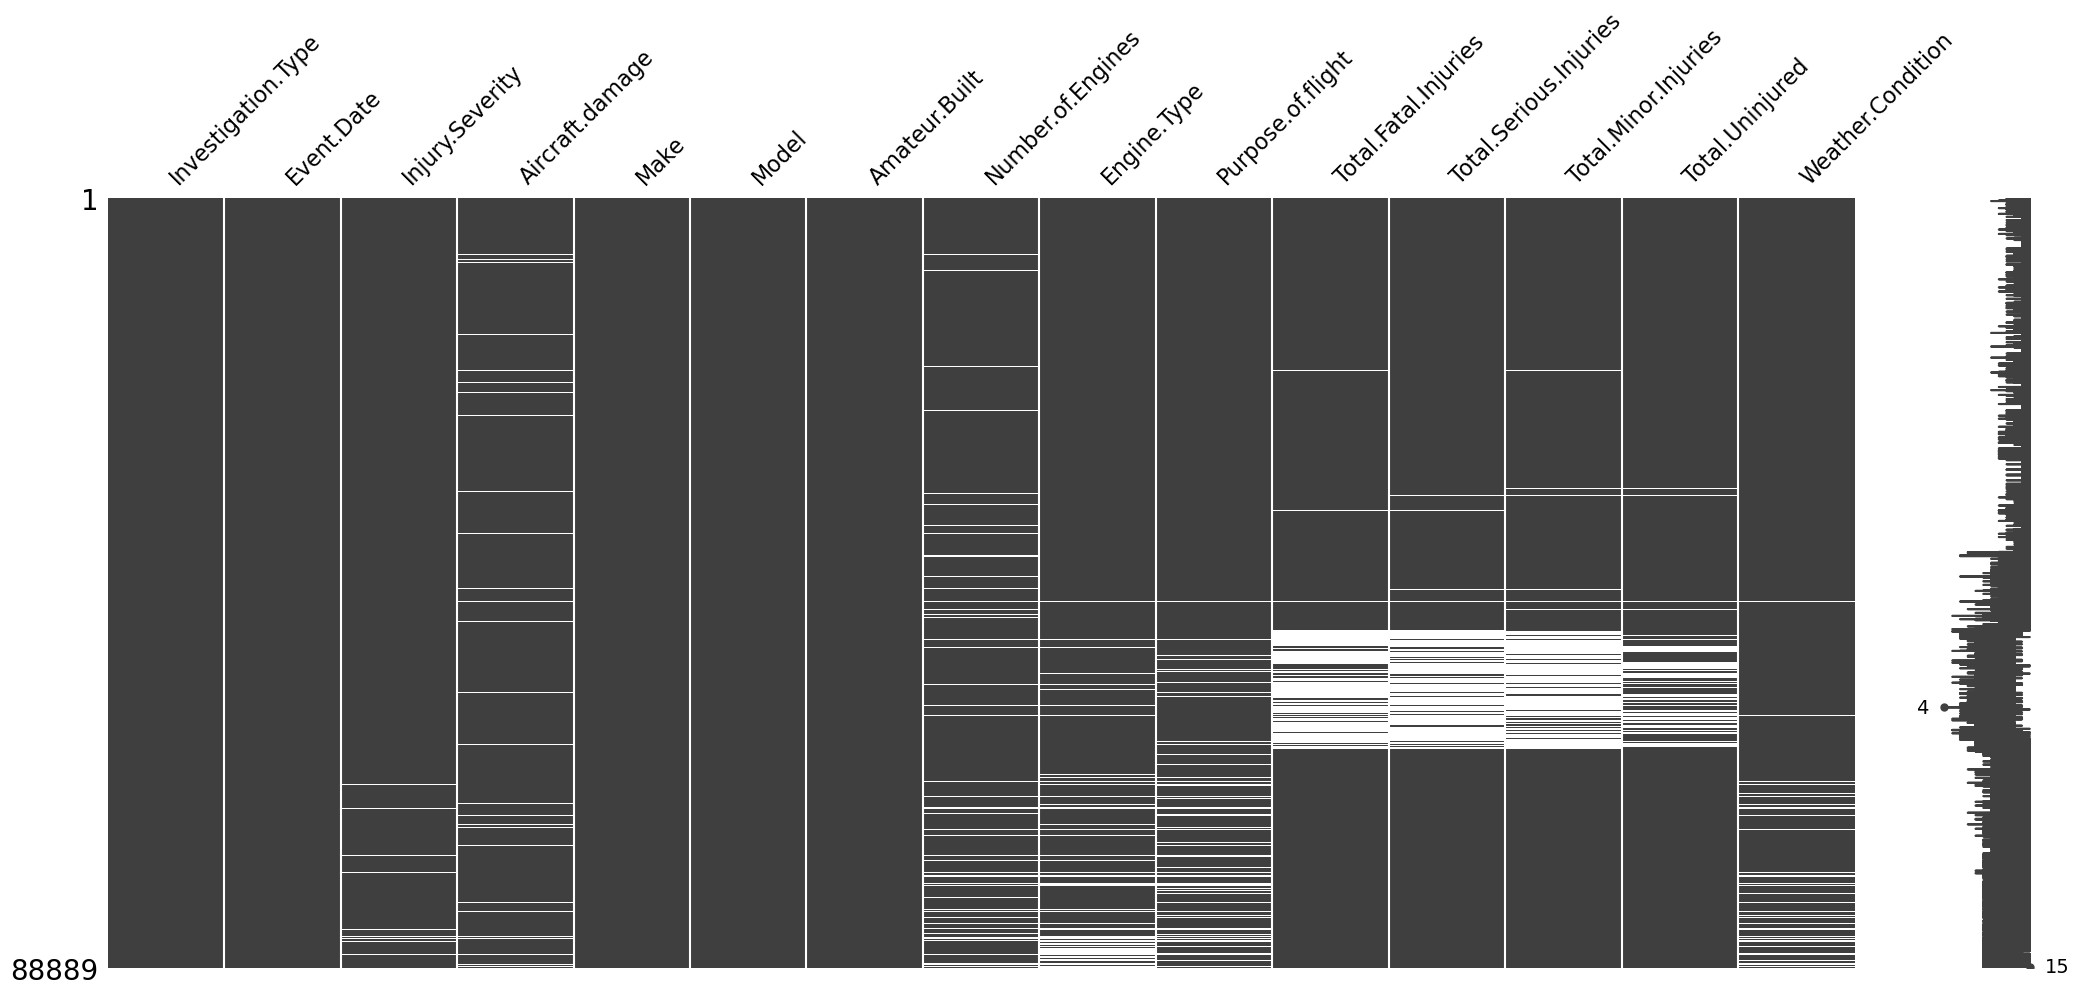

In [10]:
import missingno as msno

msno.matrix(df_clean)

In [ ]:
import matplotlib.pyplot as plt

msno.heatmap(df_clean)
plt.show()

In [ ]:
msno.bar(df_clean)
plt.show()

In [ ]:
import seaborn as sns

sns.heatmap(df_clean.isnull(), cbar=False, cmap='viridis')
plt.show()

## 3- Second Step of Data Cleaning

In [9]:
df_clean.isnull().sum()

Investigation.Type            0
Event.Date                    0
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

Okay let's first treat the Model and Make columns, because these data are mandatory for our analysis

In [10]:
df_clean.dropna(subset=['Injury.Severity'], inplace=True)

In [11]:
df_clean['Aircraft.damage'].fillna('Unknown', inplace=True)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_42980/2786794837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Aircraft.damage'].fillna('Unknown', inplace=True)


Now we can treat the remaining columns

In [12]:
df_clean.dropna(subset=['Make'], inplace=True)

In [13]:
df_clean.dropna(subset=['Model'], inplace=True)

In [14]:
df_clean['Amateur.Built'].fillna('No', inplace=True)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_42980/1108438455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Amateur.Built'].fillna('No', inplace=True)


In [15]:
df_clean.dropna(subset=['Number.of.Engines'], inplace=True)

In [16]:
df_clean.dropna(subset=['Engine.Type'], inplace=True)

In [17]:
df_clean['Purpose.of.flight'].fillna('Unknown', inplace=True)

/var/folders/44/_5xrjzf91674czc29jsl_xs00000gn/T/ipykernel_42980/3891265923.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Purpose.of.flight'].fillna('Unknown', inplace=True)


In [18]:
df_clean.dropna(subset=['Total.Fatal.Injuries'], inplace=True)

In [19]:
df_clean.dropna(subset=['Total.Serious.Injuries'], inplace=True)

In [20]:
df_clean.dropna(subset=['Total.Minor.Injuries'], inplace=True)

In [21]:
df_clean.dropna(subset=['Total.Uninjured'], inplace=True)

In [1]:
df_clean.dropna(subset=['Weather.Condition'], inplace=True)
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].str.lower().str.strip()

NameError: name 'df_clean' is not defined

In [25]:
df_clean['Make'].value_counts()

Make
Cessna               17842
Piper                 9698
CESSNA                3842
Beech                 3367
PIPER                 2253
                     ...  
Yasecko                  1
Corben Baby Ace          1
Chester                  1
Barton                   1
STEPHEN J HOFFMAN        1
Name: count, Length: 6209, dtype: int64

In [26]:
df_clean['Make'] = df_clean['Make'].str.lower().str.strip()

In [27]:
df_clean['Make'].value_counts()

Make
cessna               21684
piper                11951
beech                 4125
bell                  1951
boeing                1173
                     ...  
fallbeck                 1
petrik                   1
crowley/zenair           1
lopez lancair            1
stephen j hoffman        1
Name: count, Length: 5757, dtype: int64

In [28]:
df_clean.isnull().sum()

Investigation.Type        0
Event.Date                0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

## 4- Conclusion

In this notebook, we have completed the data cleaning process. We retained the following columns for further analysis:

* Investigation.Type
* Event.Date
* Injury.Severity
* Aircraft.damage
* Make
* Model
* Amateur.Built
* Number.of.Engines
* Engine.Type
* Purpose.of.flight
* Total.Fatal.Injuries
* Total.Serious.Injuries
* Total.Minor.Injuries
* Total.Uninjured
* Weather.Condition

The dataset is now ready for exploratory data analysis.